### Student Information
Name: 高偉傑    

Student ID: 114065527

GitHub ID: Cody-Kao

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

**Step 1: know the basic structure of data**

In [ ]:
### Begin Assignment Here
""" 
I skip some of the redundant exercises that I've practiced in Master phase 1
And i merge some of the exercises together to make it more composed
"""

### load csv data
import pandas as pd
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
print(df.shape)
print(df.columns)
print(df.head())

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  

**Step 2: query data**

In [147]:
# display only the first three rows and two specific columns
df.loc[:2, ["type", "title"]]
# from the first 5 data, display those with upvote >= 5
df.loc[(df.index <= 4) & (df["upvotes"] >= 5), :]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


**Step 3: handling missing values**

In [ ]:
def count_null_in_column(column: pd.Series):
    cnt = 0
    for rowValue in column:
        if rowValue == True:
            cnt+=1
    return ("The null value count is ", cnt)
# apply count_null function to df, to see the missing counts of each column
null_df = df.isnull().apply(count_null_in_column)
print(null_df)

# examine the data from the columns that contain missing value
print(df.loc[:10, ["downvotes", "upvote_ratio"]])
# so i find it reasonable to treat NaN value for downvotes as 0
# but according to this article https://www.reddit.com/r/help/comments/1j8qz9w/how_is_the_upvote_ratio_calculated/
# it seems not possible to restore the NaN value for upvoteratio, so i'll just leave them

# replace NaN value in downvotes to 0
df["downvotes"] = df["downvotes"].fillna(0)
null_df = df.isnull().apply(count_null_in_column)
null_df # see if the NaN values now replaced with 0

                       type                  datetime  \
0  The null value count is   The null value count is    
1                         0                         0   

                    post_id                 subreddit  \
0  The null value count is   The null value count is    
1                         0                         0   

                      title                    author  \
0  The null value count is   The null value count is    
1                         0                         0   

                        url                   upvotes  \
0  The null value count is   The null value count is    
1                         0                         0   

                  downvotes              upvote_ratio  \
0  The null value count is   The null value count is    
1                       783                       783   

                       text              subjectivity  \
0  The null value count is   The null value count is    
1                         

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is,The null value count is
1,0,0,0,0,0,0,0,0,0,783,0,0,0,0,0,0


**Step 4: apply the same count_null function again, but this time aggregate the value in the same row**

In [149]:
null_df2 = df.isnull().apply(count_null_in_column, axis=1)
null_df2

0      (The null value count is , 1)
1      (The null value count is , 1)
2      (The null value count is , 1)
3      (The null value count is , 0)
4      (The null value count is , 1)
                   ...              
842    (The null value count is , 1)
843    (The null value count is , 1)
844    (The null value count is , 0)
845    (The null value count is , 1)
846    (The null value count is , 1)
Length: 847, dtype: object

**Step 5: Checking duplicated data**

In [150]:
# checking row by row
print(sum(df.duplicated())) 

# checking some columns
print(sum(df.duplicated("post_id")))
print(sum(df.duplicated("title")))
print(sum(df.duplicated("datetime")))
print(sum(df.duplicated("author")))

# so we actually find out there are a lot duplicated values in the same column
# but since the post_id are unique, then we can interpret them as "different" posts
# Also, duplicate in "author" is normal, duplicate in "title" is normal(some of them are daily posts section, which title would be the same)
# and duplicate in "datetime" is also possible. So i will just leave them 

0
0
720
5
116


**Step 6: sampling df and plot barCharts for value counts**

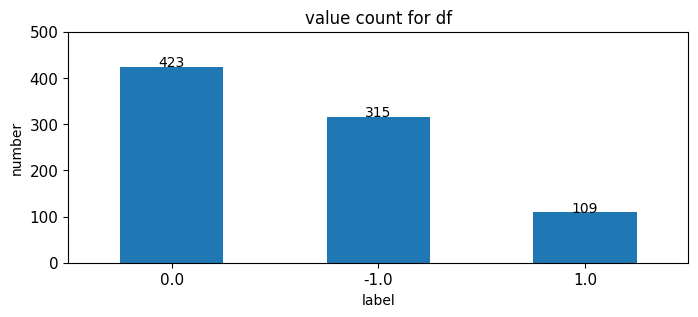

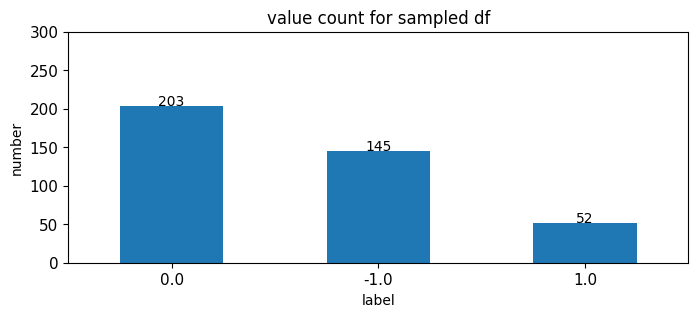

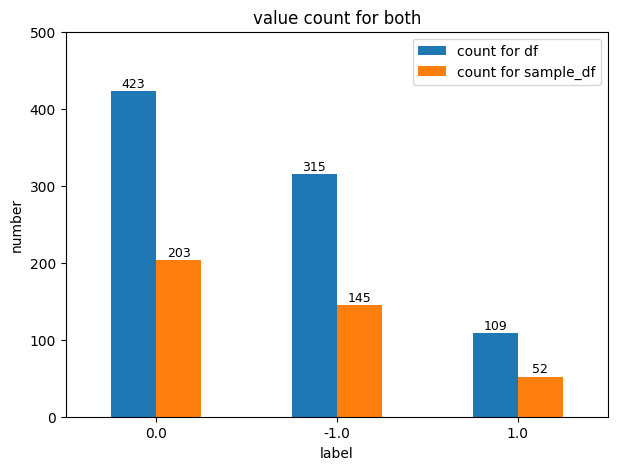

In [ ]:
df_sample = df.sample(n=400)

# plot value count for different labels
# count of whole df
df_label_count = df.label.value_counts()
# count of sampled df
df_sample_label_count = df_sample.label.value_counts()

# define the plot function
import math 
import matplotlib.pyplot as plt
# for generating a proper ylim value; e.g. 128 -> 200, 255 -> 300
def roundup(n: int, base: int=100) -> int:
    return int(math.ceil(n / base)) * base

def plot(data: pd.Series, title: str) -> None:
    plt.figure(figsize=(8, 3))
    ax = data.plot(
        kind="bar", title=title,
        ylim=[0, max(roundup(data.max()), data.max()+50)],
        rot=0, fontsize=11
    )
    ax.set_ylabel(ylabel="number")
    for i, v in enumerate(data.values):
        ax.text(i, v + 1, str(v), ha="center", fontsize=10)
    plt.show()

plot(df_label_count, "value count for df")
plot(df_sample_label_count, "value count for sampled df")

# combine two Series together and plot
combined_df = pd.concat([df_label_count, df_sample_label_count], axis=1)
combined_df.columns = ["count for df", "count for sample_df"]
ax = combined_df.plot(kind="bar", title="value count for both",
    ylim=[0, max(roundup(combined_df.max().max()), combined_df.max().max()+50)],
    rot = 0, fontsize = 10, figsize = (7,5),
    legend=["df", "df_sample"])
ax.set_ylabel(ylabel="number")
# place labels for each bar
for col_idx, col in enumerate(combined_df.columns):
    for i, v in enumerate(combined_df[col]):
        ax.text(
            i + col_idx*0.25 - 0.125,   # small offset so labels don’t overlap
            v + 5, 
            str(v), 
            ha="center", fontsize=9
        )

**Step 7: work with nltk**

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [121]:
import helpers.data_mining_helpers as dmh
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df.unigrams.head()

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

**Step 8: build an DTM with sklearn and plot a heap map for visualization**

  (np.int32(0), np.int32(646))	1
  (np.int32(0), np.int32(3087))	1
  (np.int32(1), np.int32(3515))	1
  (np.int32(1), np.int32(2197))	1
  (np.int32(1), np.int32(1115))	1
  (np.int32(1), np.int32(2287))	1
  (np.int32(1), np.int32(497))	1
  (np.int32(1), np.int32(1030))	1
  (np.int32(1), np.int32(3448))	1
  (np.int32(1), np.int32(2721))	1
  (np.int32(1), np.int32(837))	1
  (np.int32(1), np.int32(3611))	1
  (np.int32(1), np.int32(2760))	1
['00' '000' '01378' '02' '027' '03' '06' '08' '10' '100']
(847, 4105)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0

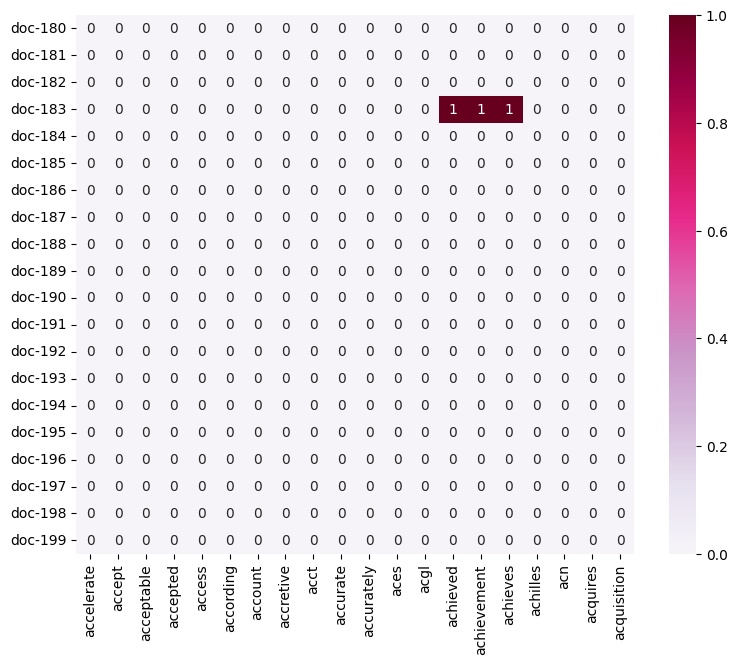

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english") # bag-of-words builder.
df_counts = count_vect.fit_transform(df.text) # learn the vocabulary and return document-term matrix(DTM)
print(df_counts[0:2])

# then inspect the basic info of count_vect and DTM
print(count_vect.get_feature_names_out()[0:10])
print(df_counts.shape)
print(df_counts[0:5, 100:200].toarray())

# plot a heap map to visualize
import seaborn as sns
# prepare a DataFrame for plotting
frequency_data = df_counts[0:20, 180:200].toarray()
columns = count_vect.get_feature_names_out()[180:200]
frequency_df = pd.DataFrame.from_records(frequency_data, columns=columns, index=[f"doc-{i}" for i in range(180, 200)])
# plot the heap map
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(frequency_df,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**Step 9: Plot top 20 words heat map based on TF-IDF with randomly sampled data**

  (np.int32(0), np.int32(646))	0.6315623006723557
  (np.int32(0), np.int32(3087))	0.7753251320378057
  (np.int32(1), np.int32(3515))	0.39923274799662617
  (np.int32(1), np.int32(2197))	0.19789018863794847
  (np.int32(1), np.int32(1115))	0.25851024882558316
  (np.int32(1), np.int32(2287))	0.24047592752938202
  (np.int32(1), np.int32(497))	0.2780388758065887
  (np.int32(1), np.int32(1030))	0.2977637972637426
  (np.int32(1), np.int32(3448))	0.3473423794922013
  (np.int32(1), np.int32(2721))	0.31405549184533726
  (np.int32(1), np.int32(837))	0.26883528261588246
  (np.int32(1), np.int32(3611))	0.31405549184533726
  (np.int32(1), np.int32(2760))	0.3473423794922013


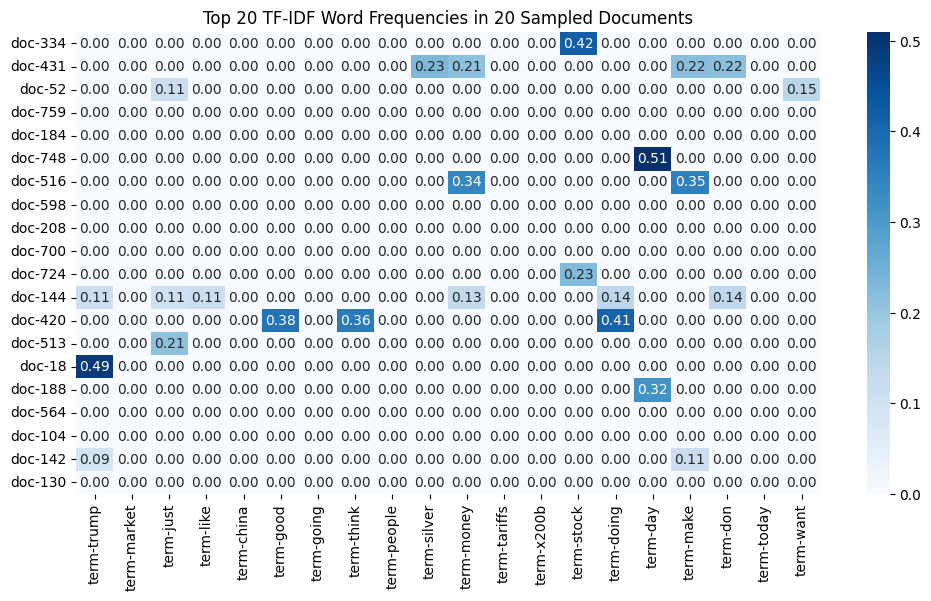

'\nAgain, in the heat map, we can easily observe that: How important of those top TF-IDF\nwords in an individual document.\n'

In [176]:
# generate DTM with TF-IDF weights
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(stop_words="english")
TFIDF_matrix = TFIDF_vectorizer.fit_transform(df.text)
print(TFIDF_matrix[:2])
# convert sparse matrix to DataFrame
df_TFIDF = pd.DataFrame.from_records(TFIDF_matrix.toarray(), columns=TFIDF_vectorizer.get_feature_names_out())

# get global TF-IDF value
df_TFIDF_mean = df_TFIDF.mean(axis=0)
# get top words and their corresponding indexes from DataFrame
num_top_words = 20
top_words = df_TFIDF_mean.sort_values(ascending=False).head(num_top_words).index
word_to_idx = {word: idx for idx, word in enumerate(TFIDF_vectorizer.get_feature_names_out())}
top_words_indexes = [word_to_idx[w] for w in top_words]

# get sampled docs
import numpy as np
num_sample_docs = 20
doc_indices = np.random.choice(df.shape[0], size=num_sample_docs, replace=False)

# Slice sparse matrix: rows = sampled docs, cols = top words
submatrix = TFIDF_matrix[doc_indices][:, top_words_indexes]

# Convert to DataFrame for readability
df_sample = pd.DataFrame(
    submatrix.toarray(),
    index=[f"doc-{i}" for i in doc_indices],          # document IDs
    columns=[f"term-{w}" for w in top_words]          # top words
)

plt.figure(figsize=(12,6))
sns.heatmap(df_sample, cmap="Blues", annot=True, fmt=".2f")
plt.title(f"Top {num_top_words} TF-IDF Word Frequencies in {num_sample_docs} Sampled Documents")
plt.show()
"""
Again, in the heat map, we can easily observe that: How important of those top TF-IDF
words in an individual document.
"""

**Step 10: calculate the term frequencies and plot a frequency barChart;
Then plot it again with Plotly package**

In [ ]:
# get array of term frequencies
term_frequencies = []
for col in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:, col].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
# inspect the frequency of the first word
term_frequencies[0]

np.int64(4)

C:\Users\user\AppData\Local\Temp\ipykernel_9252\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


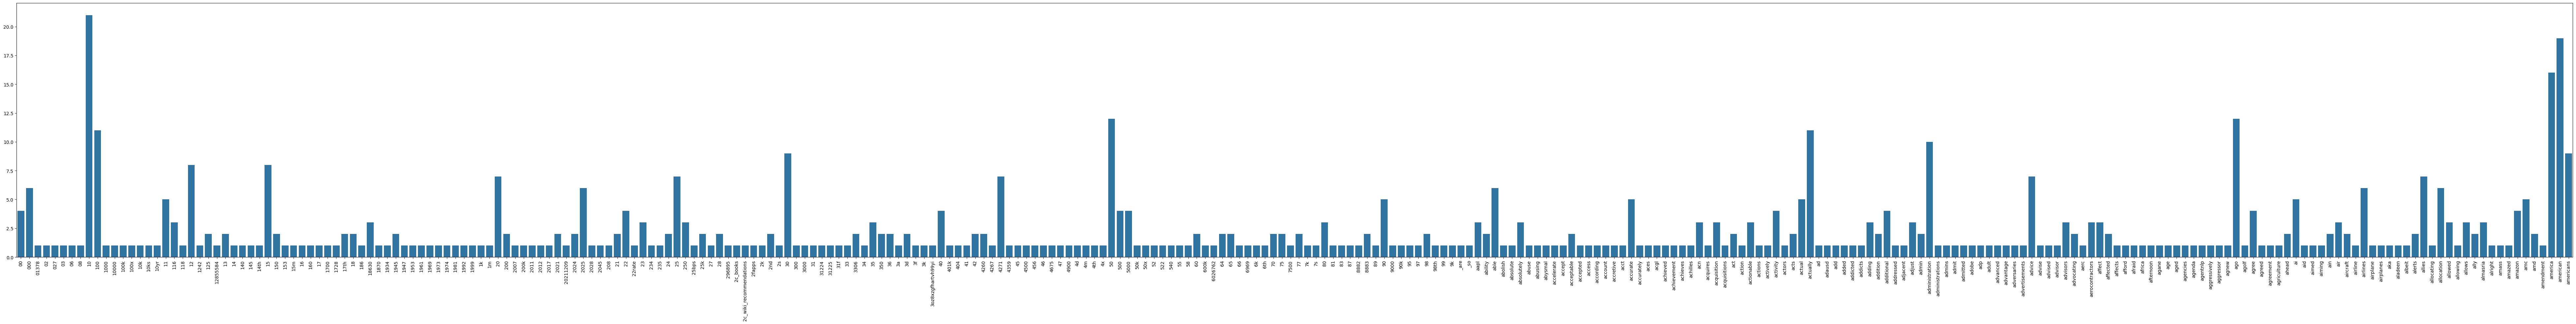

In [187]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [189]:
import plotly.express as px 

freq_df = pd.DataFrame(term_frequencies[:300], index=count_vect.get_feature_names_out()[0:300])
# Reset index to make 'word' a column
freq_df = freq_df.reset_index()
freq_df.columns = ['word', 'frequency']  # rename columns

# Plot bar chart
fig = px.bar(
    freq_df,
    x='word',            # column for x-axis
    y='frequency',       # column for y-axis
    title='First 300 Word Frequencies',  # chart title
    labels={
        'word': 'Word',         # x-axis label
        'frequency': 'frequency'    # y-axis label
    }
)

# Optional: rotate x-axis labels for readability
fig.update_layout(xaxis_tickangle=-45, xaxis_tickfont_size=10, yaxis_tickfont_size=12, width=1200, height=600)

fig.show()

**Step 11: sort the term_frequencies by frequency and plot again**

In [200]:
# map term and its frequency
term_frequencies_pair = [(w, f) for w, f in zip(count_vect.get_feature_names_out(), term_frequencies)]
term_frequencies_pair.sort(key=lambda x:[x[1], x[0]], reverse=True)
freq_df = pd.DataFrame.from_records(term_frequencies_pair[:300], columns=["word", "frequency"])

# Plot bar chart
fig = px.bar(
    freq_df,
    x='word',            # column for x-axis
    y='frequency',       # column for y-axis
    title='First 600 Word Frequencies',  # chart title
    labels={
        'word': 'Word',         # x-axis label
        'frequency': 'frequency'    # y-axis label
    }
)

# Optional: rotate x-axis labels for readability
fig.update_layout(xaxis_tickangle=-45, xaxis_tickfont_size=10, yaxis_tickfont_size=12, width=1200, height=600)

fig.show()

**Step 12: apply log function to each of the frequency value and plot**

In [201]:
# apply log function to the term_frequencies array
term_frequencies_log = [math.log(i) for i in term_frequencies]

# then do the same thing in Step 11, but replace variable term_frequencies with term_frequencies_log
# map term and its frequency
term_frequencies_pair = [(w, f) for w, f in zip(count_vect.get_feature_names_out(), term_frequencies_log)]
term_frequencies_pair.sort(key=lambda x:[x[1], x[0]], reverse=True)
freq_df = pd.DataFrame.from_records(term_frequencies_pair[:300], columns=["word", "frequency"])

# Plot bar chart
fig = px.bar(
    freq_df,
    x='word',            # column for x-axis
    y='frequency',       # column for y-axis
    title='First 600 Word Frequencies',  # chart title
    labels={
        'word': 'Word',         # x-axis label
        'frequency': 'frequency'    # y-axis label
    }
)

# Optional: rotate x-axis labels for readability
fig.update_layout(xaxis_tickangle=-45, xaxis_tickfont_size=10, yaxis_tickfont_size=12, width=1200, height=600)

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here